# Load Modules, Model and Data

In [1]:
# link to repository : 
import os
import numpy as np

import torch
import torchvision
import cv2

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Model - YoloV5
# path  = '/home/aim-beast/Desktop/hamza/projects/aip/ultralytics_yolov5_master'
# model = torch.hub.load(path, 'yolov5s', source='local')  # or yolov5m, yolov5l, yolov5x, custom


In [2]:
# Model - YoloV3
path = 'ultralytics_yolov3_master'
model = torch.hub.load(path, 'yolov3', source='local')

YOLOv3 🚀 2021-12-21 torch 1.8.1+cu102 CUDA:0 (GeForce RTX 2060 SUPER, 7979MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
Adding AutoShape... 


# Utility Functions

In [ ]:
# Read Image using OpenCV
def read_image(path, is_abs=True, img_parent = 'export/images'):
    if is_abs:
        path = os.path.join(img_parent, path)
    print(path)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


# Read Labels
def read_label(path, is_abs=True, lbl_parent = 'export/labels'):
    if is_abs:
        path = os.path.join(lbl_parent, path)
    label = open(path).readlines()
    return label
    

# gray_scale and binary
def gray_binary(path, is_abs=True, img_parent='export/images', is_binary = True, threshold=150):
    if is_abs:
        path = os.path.join(img_parent, path)
    image = cv2.imread(path)
    return image


# Bright image
def bright_image(image, level):
    image = image + level
    return image


# edge
def cany_edge(image, low, high):
    return cv2.Canny(image, low, high)


# blur
def blur(size, image):
    kernel = np.ones((size,size), np.float)/(size*size)
    dip_image = cv2.filter2D(image, -1, kernel)
    return dip_image


# Sharp Image
def sharp_image(image):
    kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
    image = cv2.filter2D(image, -1, kernel)
    return image


# Unsharp Masking
def unsharp_masking(image):
    gaussian_3 = cv2.GaussianBlur(image, (0, 0), 2.0)
    image = cv2.addWeighted(image, 2.0, gaussian_3, -1.0, 0)
    return image


# Blur and Sharp
def blur_n_sharp(size, image):
    image = blur(size=size, image=image)
    image = sharp_image(image)
    # image = unsharp_masking(image)
    return image

# Gamma correction
def gamma_correction(image, gamma=1.0):
    invGamma = 1.0/gamma
    table = np.array([
        ((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)
    ]).astype("uint8")

    return cv2.LUT(image, table)


def hist_equal(image):
    img_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    image   =  cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    return image



# Detect and Show
def detect_and_show(image_or_path, model, dip, is_abs=True, is_show=True, level=0):
    image = None
    if isinstance(image_or_path, str):
        image = read_image(image_or_path, is_abs)
    else:
        image = image_or_path.copy()
    if str.__eq__(dip, "blur"):
        image = blur(3, image)
    elif str.__eq__(dip, 'sharp'):
        image = sharp_image(image)
    elif str.__eq__(dip, 'bns'):
        image = blur_n_sharp(size=3, image=image)
    elif str.__eq__(dip, 'gamma'):
        image = gamma_correction(image)
    elif str.__eq__(dip, 'hist'):
        image = hist_equal(image)
    elif str.__eq__(dip, 'flash'):
        image=image
    with torch.no_grad():
        results = model(image)
    if is_show:
        results.show()  # or .show(), .save(), .crop(), .pandas(), etc.
        # results.save()
    return results


# Detect, Show and Benchmark
def detect_show_and_benchmark(image_or_path, label_or_path, model, dip, is_abs=True, is_show=False, level=0):
    results = detect_and_show(image_or_path=image_or_path, model=model, is_abs=is_abs, dip=dip, is_show=is_show, level=level)
    return results.xywhn[0].shape[0]

# Udacity dataset


In [ ]:
# Download Dataset
# !curl -L "https://public.roboflow.com/ds/MsvX6qP0rl?key=gKIyQvysem" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
# image_names  = os.listdir('export/images')
# image_labels = os.listdir('export/labels')


# filtered_image_labels = []
# max_counter = 0
# threshold = 10

# for imname in image_labels:
#     f = open(f'export/labels/{imname}')
#     o_len = len(f.readlines())
#     if o_len >= threshold:
#         max_counter+=1
#         filtered_image_labels.append(imname)
# print(f"Images with Objects counts greater than {threshold} are {max_counter}!")

In [ ]:
# len(image_names)

## Udacity Running

In [ ]:
# true_counts = []; detc_counts = []; dip__counts = []
# for imname in filtered_image_labels:
#     imgpath = imname.replace('.txt', '.jpg')
#     image = read_image(path=imgpath)
#     label = read_label(path=imname)
#     x, y = detect_show_and_benchmark(image_or_path=image, label_or_path=label, model=model, is_show=False, is_dip=False)
#     true_counts.append(x); detc_counts.append(y)
#     # _, y = detect_show_and_benchmark(image_or_path=image, label_or_path=label, model=model, is_show=False, is_dip=True, level=5)
#     _, y = detect_show_and_benchmark(image_or_path=image, label_or_path=label, model=model, is_show=False, is_dip=True)
#     dip__counts.append(y)


# %matplotlib inline
# true_counts.sort(); detc_counts.sort(); dip__counts.sort()
# plt.plot(true_counts, color='red')
# #  plt.title(f"Number of Object in Ground Truth.\nTotal {sum(true_counts)}!"); plt.show()
# plt.plot(detc_counts, color='blue')
# #  plt.title(f"Number of Object in Original Detection.\nTotal {sum(detc_counts)}!"); plt.show()
# plt.plot(dip__counts, color='black')
# # ; plt.title(f"Number of Object in DIP Preprocessing.\nTotal {sum(dip__counts)}!"); plt.show()

In [ ]:
# %matplotlib inline
# true_counts.sort(); detc_counts.sort(); dip__counts.sort()
# plt.plot(true_counts); plt.title(f"Number of Object in Ground Truth.\nTotal {sum(true_counts)}!"); plt.show()
# plt.plot(detc_counts); plt.title(f"Number of Object in Original Detection.\nTotal {sum(detc_counts)}!"); plt.show()
# plt.plot(dip__counts); plt.title(f"Number of Object in DIP Preprocessing.\nTotal {sum(dip__counts)}!"); plt.show()

In [ ]:
# Download COCO val
# torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')
# !unzip -q tmp.zip -d datasets && rm tmp.zip

# MS COCO

## Data Sepration

In [ ]:
import fiftyone.zoo as foz
import fiftyone as fo
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["detections", "annotations"],
    classes=["car", "bus", "truck", "motorcycle", "bicycle", "traffic light", "stop sign"], 
)

In [ ]:
dataset

In [ ]:
# Visualize the dataset in the FiftyOne App
import fiftyone as fo
session = fo.launch_app(dataset)

In [ ]:
dataset.export("selected_data", fo.type.COC )

This will data images, and json annotations. We need to convert them yolo input format .txt files. For this I found **json to yolo converter** in github and used it. It was .py file but needed some changes to make. So i did and ran it with

`python3 general_json2yolo.py`

Complete directory has also been added!

## Running COCO

1.jpg


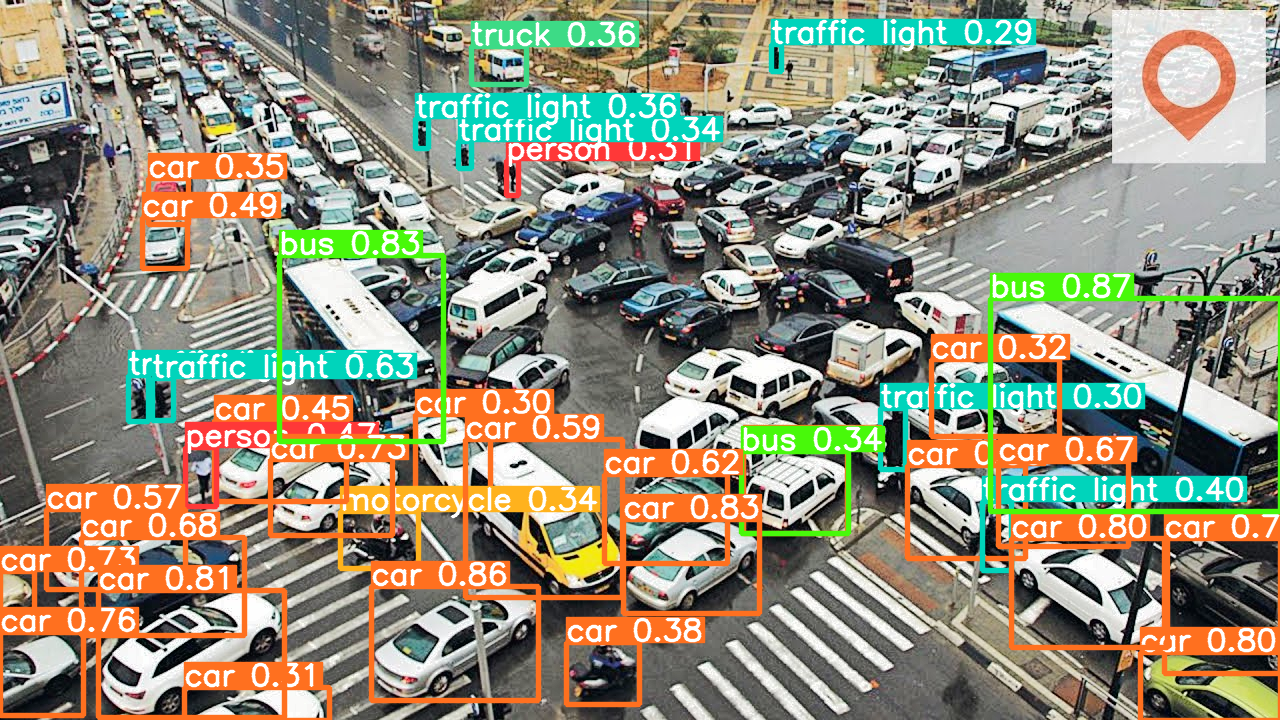

Object Detected: 37
2.png


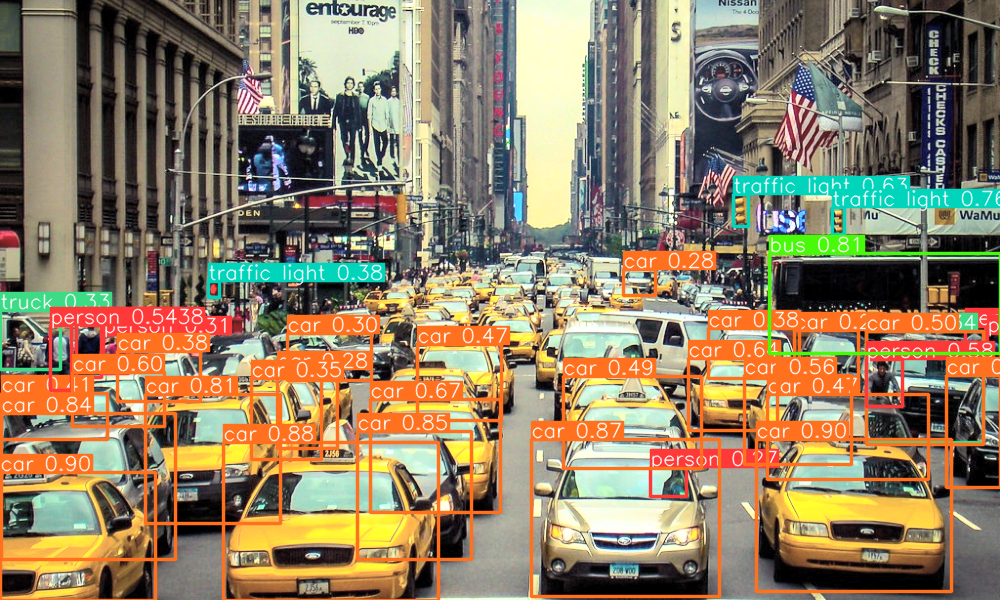

Object Detected: 37
3.jpg


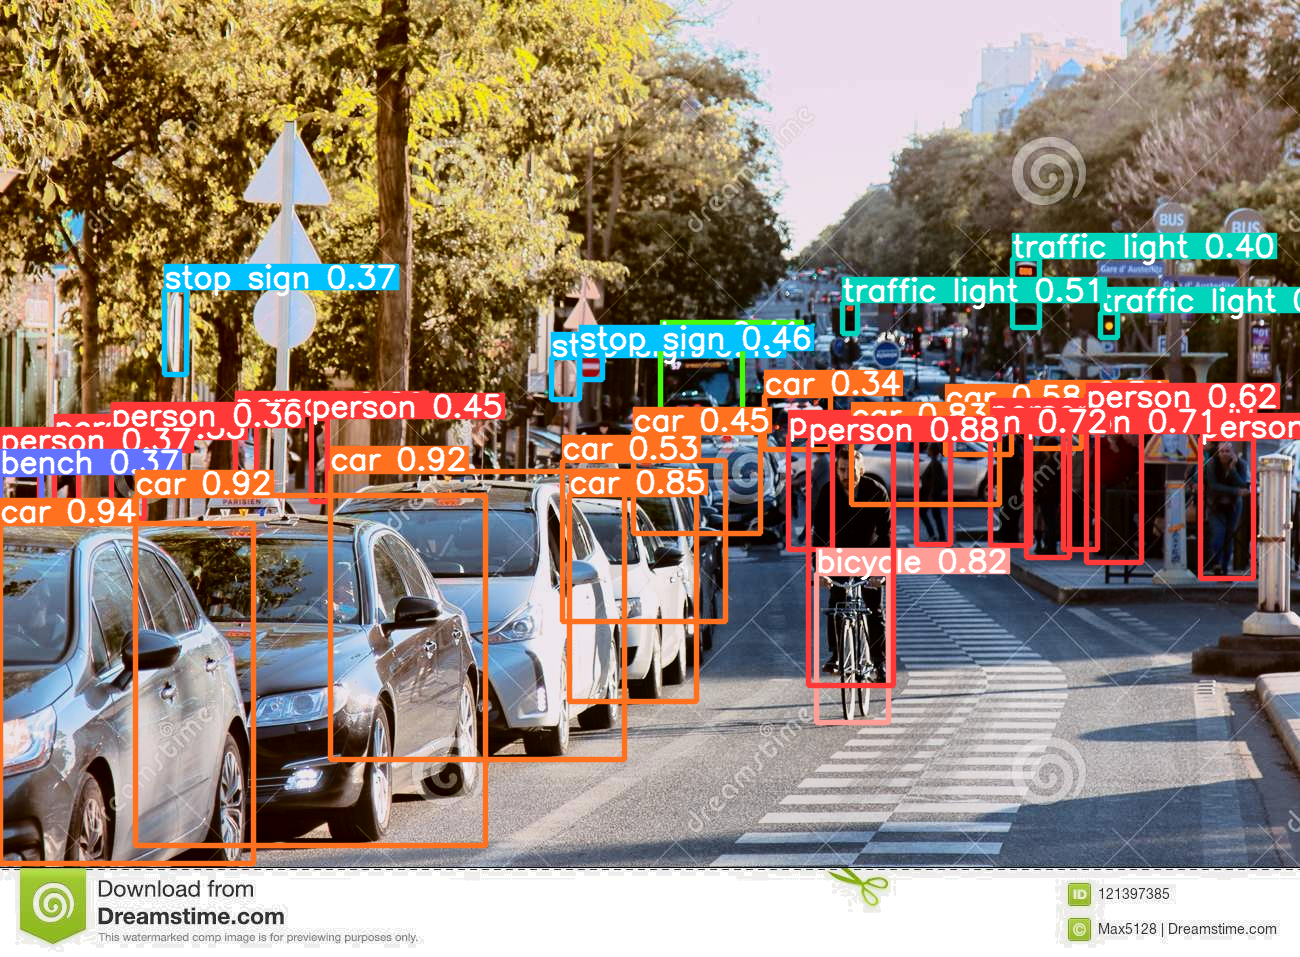

Object Detected: 32


In [8]:
# Sharp
technique = 'hist'
image_names  = ['1.jpg', '2.png', '3.jpg']
for img_name in image_names:
    result = detect_show_and_benchmark(image_or_path=img_name, label_or_path=None, model=model, dip=technique, is_abs=False, is_show=True)
    print(f"Object Detected: {result}")

In [ ]:
# path='1.jpg'
# print("Showing Original Image!")
# org_results = detect_and_show(input_=path, model=model, is_abs=False, is_dip=False)
# print("Showing BLUR_SHARP image!")
# dip_results = detect_and_show(input_=path, model=model, is_abs=False)

In [ ]:
# image = read_image(path='1478897843571726509_jpg.rf.AEMbkY6wV2hVsZ1dKnaB.jpg')
# label = read_label(path='1478897843571726509_jpg.rf.AEMbkY6wV2hVsZ1dKnaB.txt')
# %matplotlib inline
# plt.imshow(image); plt.title(f"Image with {len(label)} Ground truth labeled Objects!"); plt.show()

In [ ]:
# detect_show_and_benchmark(image_or_path='1.jpg', label_or_path=None, model=model, is_abs=False, is_show=True, is_dip=False)


In [ ]:
# detect_show_and_benchmark(image_or_path='2.png', label_or_path=None, model=model, is_abs=False, is_show=True, is_dip=True)


In [ ]:
# detect_show_and_benchmark(image_or_path='3.jpg', label_or_path=None, model=model, is_abs=False, is_show=True, is_dip=True)


## Preprocessing with 5 DIP Techniques

In [1]:
def save_img(image, name, is_abs=True, img_parent='sharp'):
    if is_abs:
        name = os.path.join(f'coco128_{img_parent}/images/val2017/', name)
    # plt.imshow(image); plt.show()
    plt.imsave(name, image)#.imwrite(name, image)

In [ ]:
root = 'coco128_flash/images/val2017/'
images_names = os.listdir(root)

In [ ]:
for img_name in images_names:
    img = read_image(img_name)
    sharp_img = sharp_image(img)
    blur_img  = blur(3, img)
    bns_img   = sharp_image(blur_img)
    gamma     = gamma_correction(img, gamma=2.0)
    hist_eq   = hist_equal(img)
    save_img(sharp_img, img_name, img_parent='sharp')
    save_img(blur_img,  img_name, img_parent='blur')
    save_img(bns_img,   img_name, img_parent='bns')
    save_img(gamma,     img_name, img_parent='gamma')
    save_img(hist_eq,   img_name, img_parent='histequal')
    # break

# Running COCO and computing metircs


In [ ]:
!python3 val.py --data data/coco.yaml --img 640 --verbose
# keep changing coco.yml file and change directories path. from flash to all dip technique one by one all directories